In [ ]:
# Problem Statement  
# There is a need for a visual search tool to assist in the preliminary detection of specific 
# diseases using high-quality images. 
# This project aims to develop a deep learning system that provides initial analysis based on 
# uploaded images, emphasizing that users must consult a doctor for a confirmed diagnosis.


# DATASETS

# skin-cancer-mnist-ham10000


In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from keras.layers import Convolution2D , MaxPooling2D , Dense ,Flatten, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [5]:
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

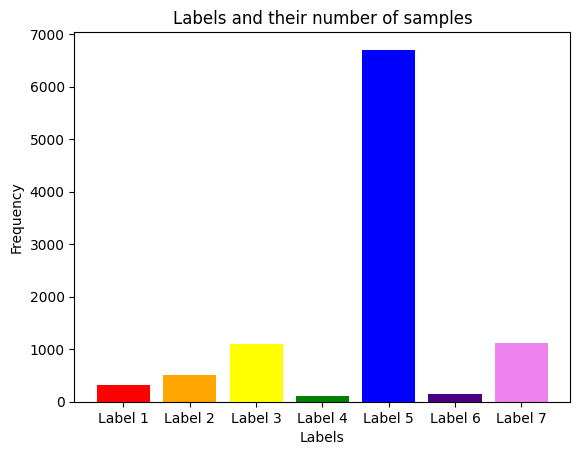

In [6]:
def printDataBalance(Y):
    data = [0 for _ in range(7)]
    for i in Y:
        data[i] += 1

    # Colors for each bar
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

    # Create histogram
    plt.bar(range(len(data)), data, color=colors)

    # Adding labels and title
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.title('Labels and their number of samples')

    # Customize x-axis ticks
    plt.xticks(range(len(data)), ['Label {}'.format(i+1) for i in range(len(data))])

printDataBalance(Y)

In [7]:
oversample = RandomOverSampler(random_state=42)
X, Y  = oversample.fit_resample(X, Y)

X = X.to_numpy()
Y = Y.to_numpy()

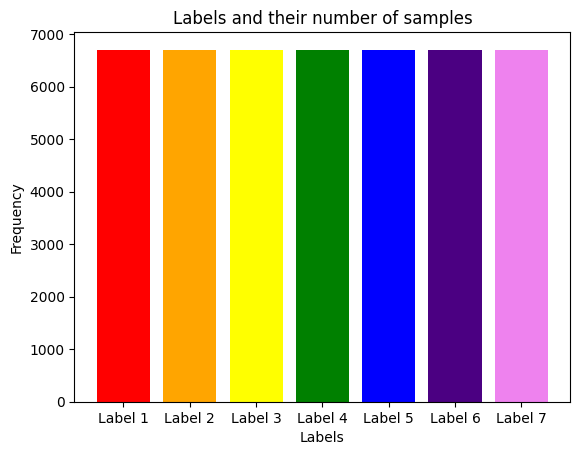

In [8]:
printDataBalance(Y)

In [9]:
# Reshapes the features to have a 4D shape
# compatible with convolutional layers (height, width, channels)
# and normalizes the pixel values to be between 0 and 1.

Y = np.reshape(Y ,(46935,1))
X = np.reshape(X , (46935 , 28 , 28, 3))
Actual_X = X
Actual_Y = Y
X = X/256

In [10]:
# Callback to reducing the learning rate during training if
# monitored metric (val_accuracy in this case) does not improve.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

early_stopping_callback = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                                       patience=5,  # Number of epochs with no improvement after which training will be stopped
                                       restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

In [11]:
# Model architecture
def model_function():
    model = Sequential([
        # Convolutional layers
        Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3), padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(64, (3, 3), activation='relu', padding='same'),
        Convolution2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(128, (3, 3), activation='relu', padding='same'),
        Convolution2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(256, (3, 3), activation='relu', padding='same'),
        Convolution2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        # Flatten and dense layers
         Flatten(),
        Dropout(rate=0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        BatchNormalization(),
        # Output layer
        Dense(7, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = model_function()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 1,208,263 (4.61 MB)

 Trainable params: 1,207,367 (4.61 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/25


I0000 00:00:1731546003.429656      98 service.cc:145] XLA service 0x7e37e4008660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731546003.429712      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 21/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2478 - loss: 2.1060

I0000 00:00:1731546009.673275      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


294/294 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4926 - loss: 1.3637 - val_accuracy: 0.1474 - val_loss: 3.6751 - learning_rate: 0.0010
Epoch 2/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8337 - loss: 0.4453 - val_accuracy: 0.6944 - val_loss: 0.9731 - learning_rate: 0.0010
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8976 - loss: 0.2773 - val_accuracy: 0.8774 - val_loss: 0.3351 - learning_rate: 0.0010
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9370 - loss: 0.1766 - val_accuracy: 0.8000 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 5/25
288/294 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9509 - loss: 0.1368
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9509 - loss: 0.1368 - val_accuracy: 0.7673 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 6/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9815 - loss: 0.0591 - val_accura

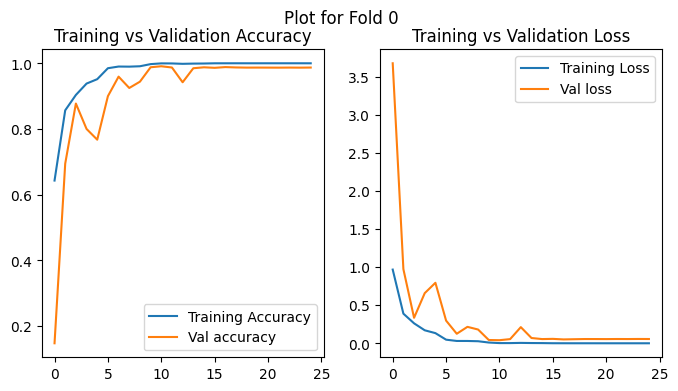

Epoch 1/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4745 - loss: 1.4311 - val_accuracy: 0.2305 - val_loss: 2.9200 - learning_rate: 0.0010
Epoch 2/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8338 - loss: 0.4610 - val_accuracy: 0.8431 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9044 - loss: 0.2605 - val_accuracy: 0.7397 - val_loss: 0.8992 - learning_rate: 0.0010
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9362 - loss: 0.1792 - val_accuracy: 0.8500 - val_loss: 0.4681 - learning_rate: 0.0010
Epoch 5/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9528 - loss: 0.1389 - val_accuracy: 0.9044 - val_loss: 0.2907 - learning_rate: 0.0010
Epoch 6/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9603 - loss: 0.1143 - val_accuracy: 0.7468 - val_loss: 0.9651 - learning_rate: 0.0010
Epoch 7/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9688 - loss: 0.0840 

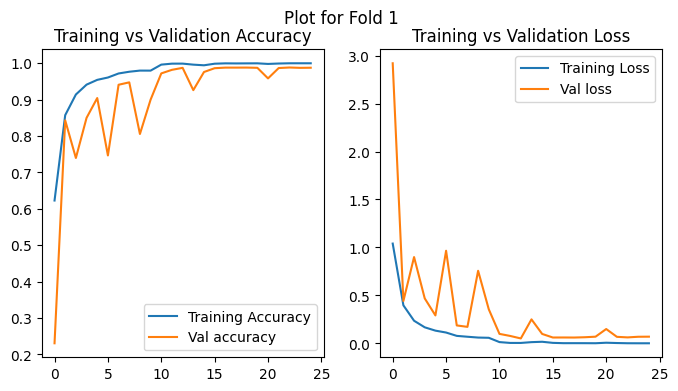

Epoch 1/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5117 - loss: 1.3122 - val_accuracy: 0.2201 - val_loss: 3.1066 - learning_rate: 0.0010
Epoch 2/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8377 - loss: 0.4428 - val_accuracy: 0.5499 - val_loss: 1.5585 - learning_rate: 0.0010
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9118 - loss: 0.2529 - val_accuracy: 0.8831 - val_loss: 0.3182 - learning_rate: 0.0010
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9430 - loss: 0.1638 - val_accuracy: 0.8302 - val_loss: 0.5245 - learning_rate: 0.0010
Epoch 5/25
288/294 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9491 - loss: 0.1397
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9492 - loss: 0.1395 - val_accuracy: 0.8621 - val_loss: 0.4108 - learning_rate: 0.0010
Epoch 6/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9791 - loss: 0.0636 -

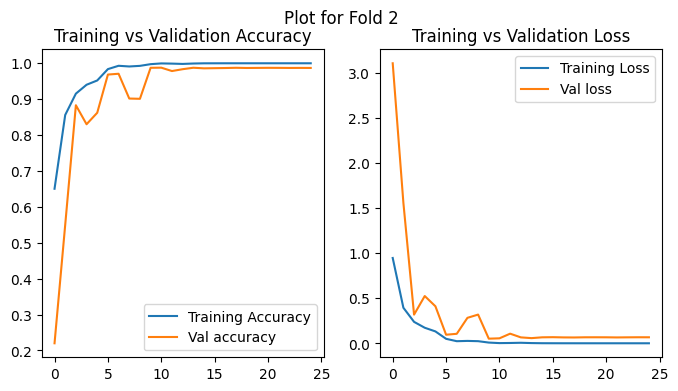

Epoch 1/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4912 - loss: 1.3763 - val_accuracy: 0.1470 - val_loss: 3.6275 - learning_rate: 0.0010
Epoch 2/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8359 - loss: 0.4573 - val_accuracy: 0.7233 - val_loss: 0.8134 - learning_rate: 0.0010
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9082 - loss: 0.2543 - val_accuracy: 0.8518 - val_loss: 0.4486 - learning_rate: 0.0010
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9326 - loss: 0.1882 - val_accuracy: 0.7485 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 5/25
288/294 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9480 - loss: 0.1416
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9481 - loss: 0.1415 - val_accuracy: 0.8488 - val_loss: 0.4579 - learning_rate: 0.0010
Epoch 6/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9758 - loss: 0.0729 -

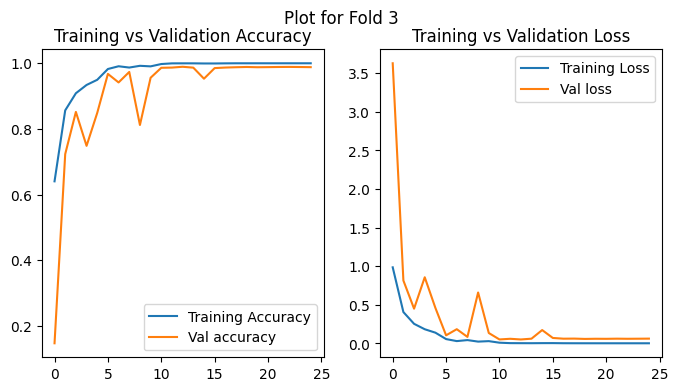

Epoch 1/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4915 - loss: 1.3767 - val_accuracy: 0.1686 - val_loss: 2.9946 - learning_rate: 0.0010
Epoch 2/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8216 - loss: 0.4974 - val_accuracy: 0.6465 - val_loss: 1.1586 - learning_rate: 0.0010
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8933 - loss: 0.2939 - val_accuracy: 0.9004 - val_loss: 0.2797 - learning_rate: 0.0010
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9336 - loss: 0.1852 - val_accuracy: 0.9107 - val_loss: 0.2400 - learning_rate: 0.0010
Epoch 5/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9523 - loss: 0.1393 - val_accuracy: 0.8342 - val_loss: 0.4763 - learning_rate: 0.0010
Epoch 6/25
288/294 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9551 - loss: 0.1265
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9552 - loss: 0.1263 -

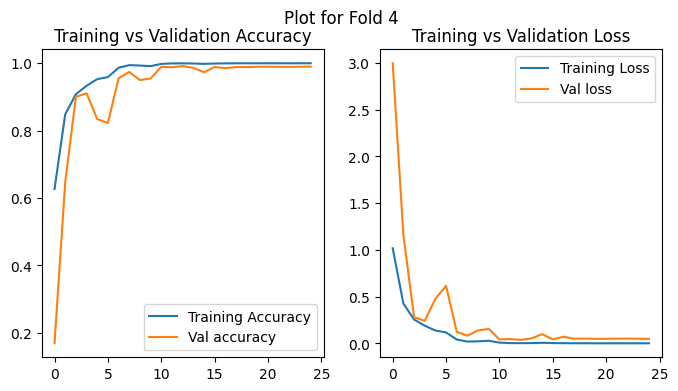

In [12]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = model_function()

    # Train the model
    fitting_stats = model.fit(X_train , y_train , epochs = 25 , batch_size=128 , validation_data=(X_test , y_test),
              callbacks=[learning_rate_reduction])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy}")


    acc = fitting_stats.history['accuracy']
    val_acc = fitting_stats.history['val_accuracy']

    loss = fitting_stats.history['loss']
    val_loss = fitting_stats.history['val_loss']
    plt.figure(figsize=(8,4))

    plt.subplot(1 , 2 , 1 )
    plt.plot(range(25) , acc , label="Training Accuracy")
    plt.plot(range(25) , val_acc , label="Val accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(loc="lower right")


    plt.subplot(1 , 2 , 2 )
    plt.plot(range(25) , loss  , label="Training Loss")
    plt.plot(range(25) , val_loss , label="Val loss")
    plt.title("Training vs Validation Loss")
    plt.legend(loc="upper right")


    plt.suptitle('Plot for Fold '+ str(i) )
    plt.show()
    i = i+1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


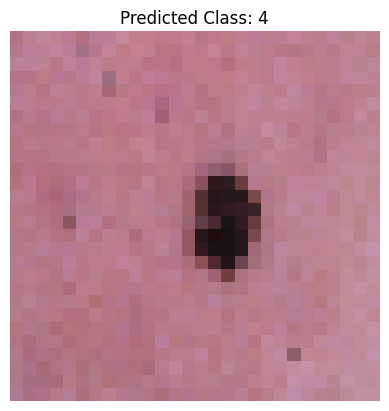

Predicted Label: Label 5


In [15]:
# Import the required libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def classify_image(image_path, model):
    # Load the image, resize it to (28, 28), and convert it to RGB
    img = image.load_img(image_path, target_size=(28, 28))  # Load image with target size of 28x28
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    
    # Normalize the image (same as training data)
    img_array = img_array / 256.0  # Normalize to range [0, 1] since you did that in training
    
    # Reshape image to match input shape expected by the model (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Get model prediction
    predictions = model.predict(img_array)  # Predict the class probabilities
    
    # Get the predicted class (index of the maximum value in the prediction)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Display the image and predicted class
    plt.imshow(img)  # Display the image
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    return predicted_class

# Example usage: Replace 'path_to_image.jpg' with the path to your image file
image_path = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029313.jpg'  # Provide the path to the image you want to classify
predicted_class = classify_image(image_path, model)

# Map predicted class to a label (adjust based on your dataset's labels)
class_labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7']
print(f"Predicted Label: {class_labels[predicted_class]}")
